In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [6]:
# Step 1: Data Loading
train_data = pd.read_csv('SalaryData_TrainSVM.csv')
test_data = pd.read_csv('SalaryData_TestSVM.csv')



In [7]:
# Step 2: Data Preprocessing
# Drop any rows with missing values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)


In [8]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column] = label_encoder.fit_transform(train_data[column])
        test_data[column] = label_encoder.transform(test_data[column])



In [9]:
# Split features and target variable
X_train = train_data.drop(columns=['Salary'])
y_train = train_data['Salary']
X_test = test_data.drop(columns=['Salary'])
y_test = test_data['Salary']


In [10]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Step 3: Model Training
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)



SVC(kernel='linear', random_state=42)

In [23]:
# Step 4: Model Evaluation
y_pred = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8088313413014608
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11360
           1       0.76      0.32      0.45      3700

    accuracy                           0.81     15060
   macro avg       0.79      0.64      0.67     15060
weighted avg       0.80      0.81      0.78     15060



In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
print(train_data.describe())


                age    workclass    education   educationno  maritalstatus  \
count  30161.000000  30161.00000  30161.00000  30161.000000   30161.000000   
mean      38.438115      2.19933     10.33361     10.121316       2.580087   
std       13.134830      0.95394      3.81226      2.550037       1.498018   
min       17.000000      0.00000      0.00000      1.000000       0.000000   
25%       28.000000      2.00000      9.00000      9.000000       2.000000   
50%       37.000000      2.00000     11.00000     10.000000       2.000000   
75%       47.000000      2.00000     12.00000     13.000000       4.000000   
max       90.000000      6.00000     15.00000     16.000000       6.000000   

         occupation  relationship          race           sex   capitalgain  \
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000   
mean       5.959849      1.418322      3.678592      0.675707   1092.044064   
std        4.029633      1.601361      0.834721      0.46811

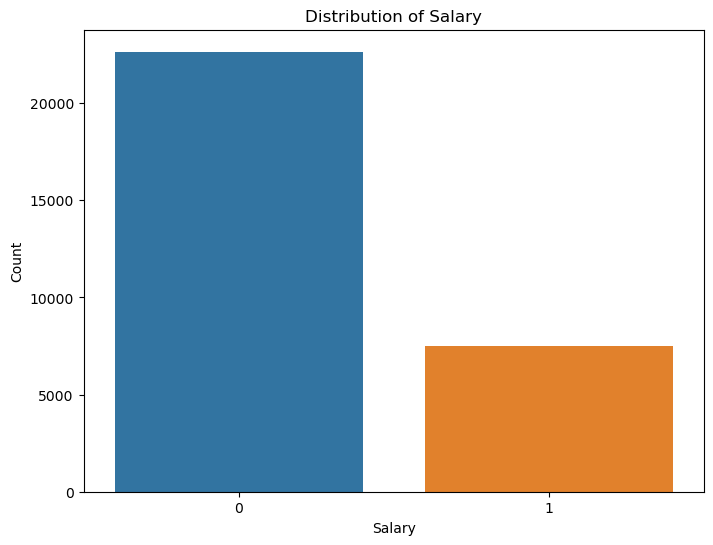

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Salary')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

C:\Users\gkhya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

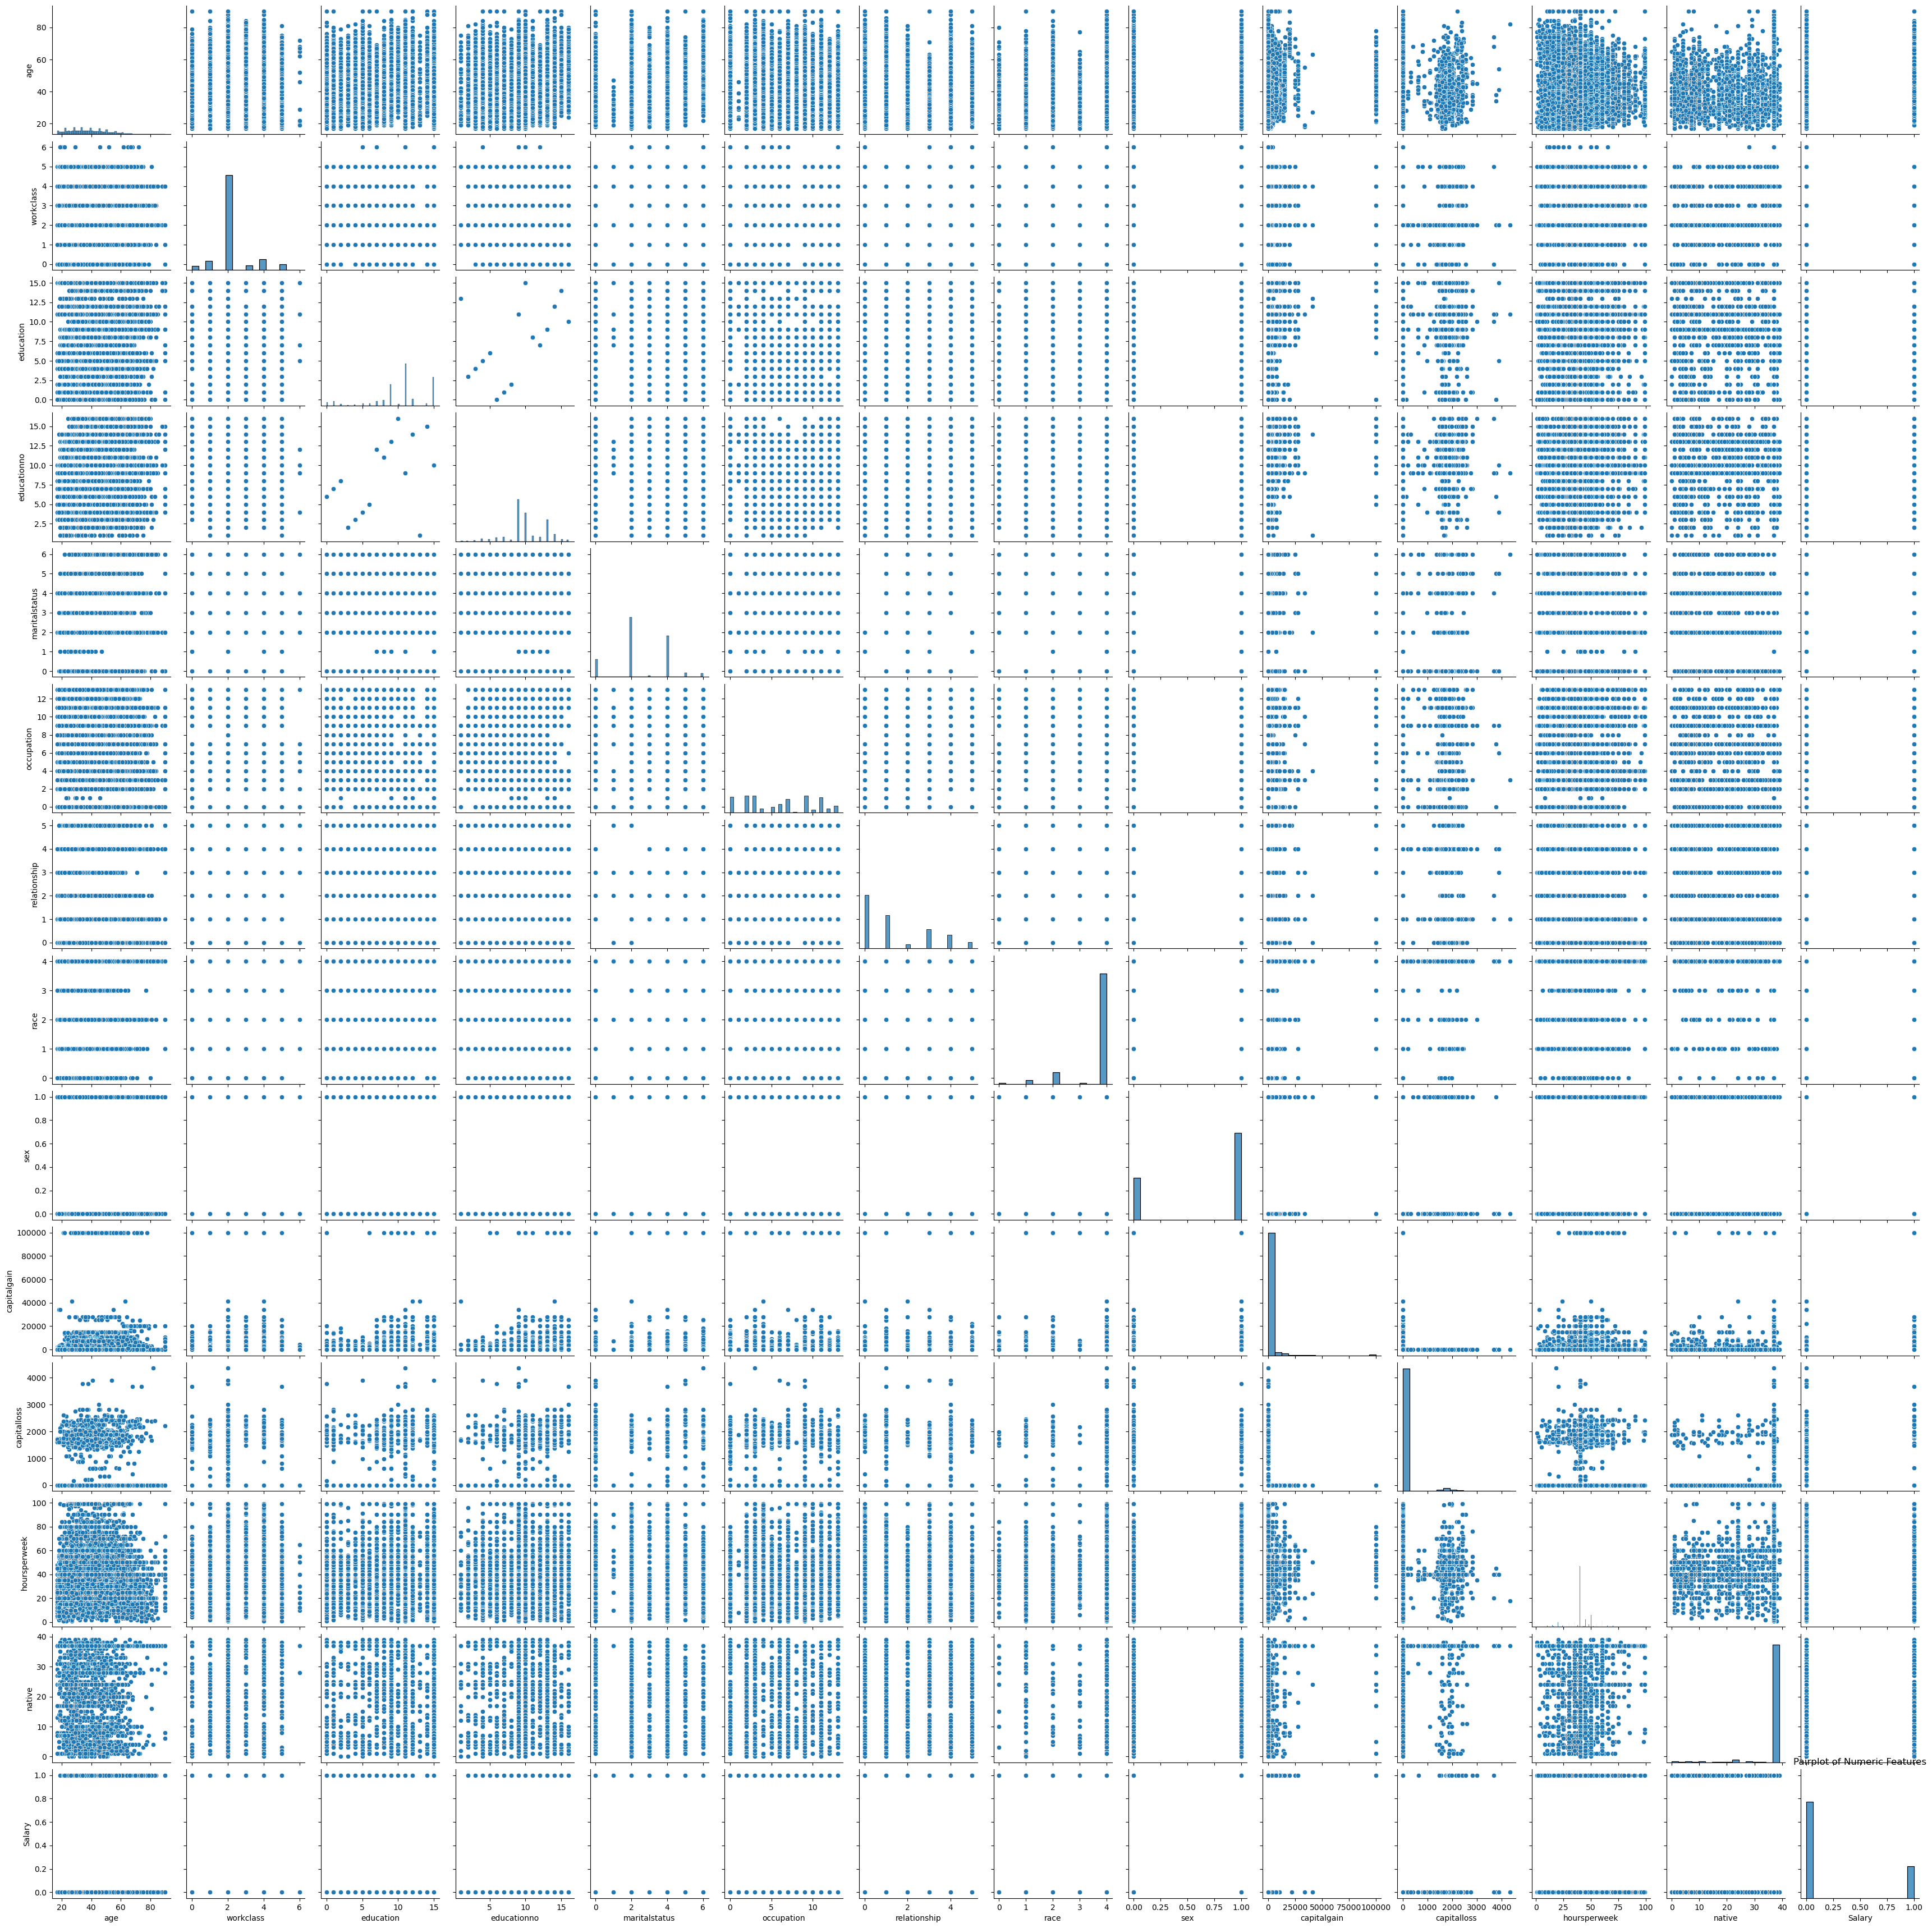

In [16]:
plt.figure(figsize=(10, 8))
sns.pairplot(train_data)
plt.title('Pairplot of Numeric Features')
plt.show()

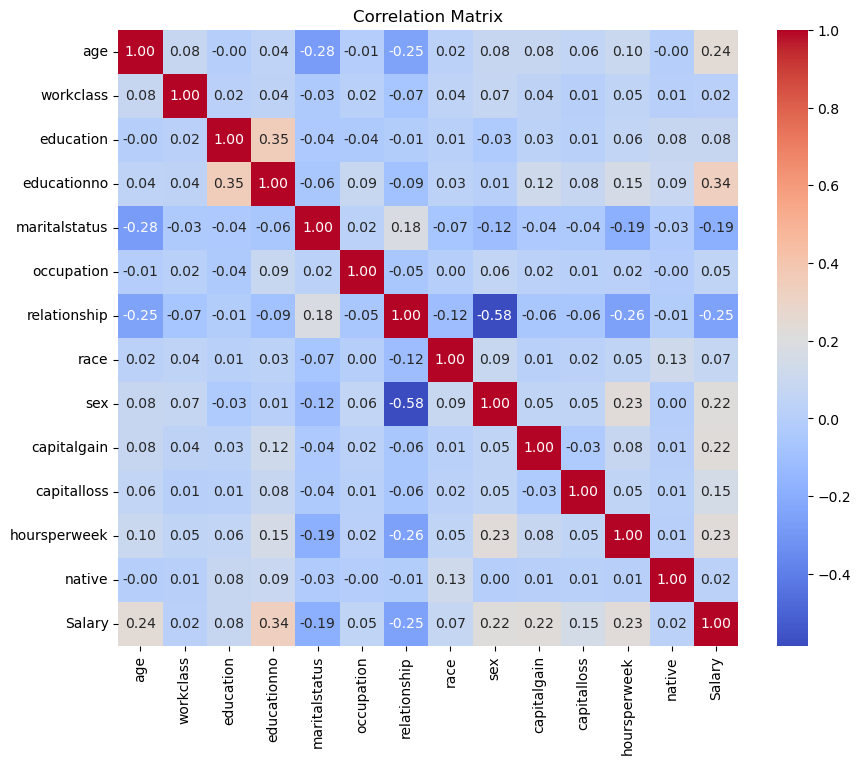

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
plt.figure(figsize=(12, 10))
for column in train_data.select_dtypes(include=['object']).columns:
    plt.subplot(3, 3, i)
    sns.countplot(data=train_data, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>